In [1]:
# Load packages
import pandas as pd
import numpy as np
import re
import math
from time import strptime  # format data columns
import random  # used in subsampling
import warnings

warnings.filterwarnings("ignore")  # ignore warnings throughout notebook
pd.set_option("display.max_columns", None)  # show all columns

In [2]:
# Load Data
file_path = "accepted_subsampled_5percent.csv" #will be personalized
df = pd.read_csv(file_path, sep=",")

### Joe's section: Sanity check for some features (does Joe's sampled data agree with Jon's sampled data?)

In [3]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'issue_year', 'issue_month'],
      dtype='object', length=153)

In [4]:
# Joe's sample of 10,000 got a mean of 77,524
df.annual_inc.mean()

78025.03015175184

In [5]:
# Joe's sample of 10,000 got a mean of 19
df.dti.mean()

18.76649418537898

In [6]:
# Joe's data shows mean of 703
df.fico_range_high.mean()

702.6731161165666

In [7]:
# Joe's mean = 699
df.fico_range_low.mean()

698.6729661293596

In [8]:
# Joe's mean = 13
df.int_rate.mean()

13.070952771674843

In [9]:
# Joe's mean of 10,000 samples is: 16,345
df.revol_bal.mean()

16666.489205332487

In [10]:
print("Jon's data and Joe's data effectively look the same...awesome")

Jon's data and Joe's data effectively look the same...awesome


### Joe's EDA function

In [11]:
def EDA_2(df):
    for column in sorted(df.columns):
        print("#"*50)
        print("Random sample of column name (",column,")...")
        print(df[column].sample(n=10))

        print("")

        print("Number of missing values:",df[column].isnull().sum())

        print("")

        if df[column].dtype.name == "category":
            print(df[column].value_counts())
        else:
            print(df[column].describe())
        print("#"*50)

        print("")
        print("")
        print("")

In [12]:
EDA_2(df)

##################################################
Random sample of column name ( acc_now_delinq )...
962      0.0
14570    0.0
71613    0.0
69152    0.0
17800    0.0
23470    0.0
15638    0.0
99382    0.0
63663    0.0
70662    0.0
Name: acc_now_delinq, dtype: float64

Number of missing values: 21

count    113322.000000
mean          0.004174
std           0.068455
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: acc_now_delinq, dtype: float64
##################################################



##################################################
Random sample of column name ( acc_open_past_24mths )...
112920    0.0
61067     1.0
103906    4.0
89409     1.0
88708     6.0
61547     7.0
91550     3.0
43706     7.0
53366     3.0
98073     9.0
Name: acc_open_past_24mths, dtype: float64

Number of missing values: 2777

count    110566.000000
mean          4.518333
std           3.158469
min           0.000000
25%      

count      105060
unique      46115
top       Teacher
freq         1921
Name: emp_title, dtype: object
##################################################



##################################################
Random sample of column name ( fico_range_high )...
28795     694.0
95273     734.0
83309     734.0
43472     704.0
5345      709.0
107451    684.0
81975     754.0
96524     794.0
26418     684.0
46004     689.0
Name: fico_range_high, dtype: float64

Number of missing values: 0

count    113343.000000
mean        702.673116
std          32.972378
min         614.000000
25%         679.000000
50%         694.000000
75%         719.000000
max         850.000000
Name: fico_range_high, dtype: float64
##################################################



##################################################
Random sample of column name ( fico_range_low )...
39798     745.0
15335     665.0
104567    745.0
102886    700.0
4222      700.0
73599     675.0
64472     715.0
87824     690.0
106640

Number of missing values: 112795

count                                 548
unique                                  1
top       INTEREST ONLY-3 MONTHS DEFERRAL
freq                                  548
Name: hardship_type, dtype: object
##################################################



##################################################
Random sample of column name ( home_ownership )...
30239          OWN
49507         RENT
9858          RENT
68241     MORTGAGE
27211         RENT
99763     MORTGAGE
71619     MORTGAGE
32633     MORTGAGE
46124     MORTGAGE
110396        RENT
Name: home_ownership, dtype: object

Number of missing values: 0

count       113343
unique           6
top       MORTGAGE
freq         55496
Name: home_ownership, dtype: object
##################################################



##################################################
Random sample of column name ( id )...
20830     29114020
94026    132248934
57167     85517352
89977    127146496
74165    108749460


Number of missing values: 126

count       113217
unique         135
top       Mar-2019
freq         42496
Name: last_pymnt_d, dtype: object
##################################################



##################################################
Random sample of column name ( loan_amnt )...
20917      9000.0
39282     24000.0
67878      5000.0
66412     11000.0
75214     36000.0
26669      6300.0
10345     12375.0
76643     30000.0
43218      5000.0
111404     8000.0
Name: loan_amnt, dtype: float64

Number of missing values: 0

count    113343.000000
mean      15039.538392
std        9218.284144
min         500.000000
25%        8000.000000
50%       12800.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64
##################################################



##################################################
Random sample of column name ( loan_status )...
55061        Current
44037    Charged Off
62831        Current
79641     Fully Paid
42837     Ful

Name: num_accts_ever_120_pd, dtype: float64
##################################################



##################################################
Random sample of column name ( num_actv_bc_tl )...
83250     5.0
37719     4.0
106901    6.0
38        NaN
106920    6.0
75172     4.0
9943      3.0
96124     2.0
71595     4.0
103742    4.0
Name: num_actv_bc_tl, dtype: float64

Number of missing values: 3789

count    109554.000000
mean          3.670099
std           2.316603
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          32.000000
Name: num_actv_bc_tl, dtype: float64
##################################################



##################################################
Random sample of column name ( num_actv_rev_tl )...
36315    3.0
92462    1.0
21685    9.0
79501    1.0
71740    4.0
57780    5.0
44649    5.0
5425     5.0
27840    7.0
31878    9.0
Name: num_actv_rev_tl, dtype: float64

Number of missing values: 3789

count    10

count    113343.000000
mean       4193.934556
std        7341.630742
min           0.000000
25%           0.000000
50%           0.000000
75%        6140.250000
max       39091.640000
Name: out_prncp, dtype: float64
##################################################



##################################################
Random sample of column name ( out_prncp_inv )...
62111     15669.98
35621         0.00
58635         0.00
63026         0.00
36632      5212.65
86034         0.00
112688     9326.86
30404         0.00
63099         0.00
53611         0.00
Name: out_prncp_inv, dtype: float64

Number of missing values: 0

count    113343.000000
mean       4193.015418
std        7340.703732
min           0.000000
25%           0.000000
50%           0.000000
75%        6135.045000
max       39091.640000
Name: out_prncp_inv, dtype: float64
##################################################



##################################################
Random sample of column name ( payment_plan_star

Number of missing values: 0

count         113343
unique             2
top        36 months
freq           80944
Name: term, dtype: object
##################################################



##################################################
Random sample of column name ( title )...
74057                        Debt consolidation
35330                        Debt consolidation
22911                        Debt consolidation
72638                        Debt consolidation
67207                        Debt consolidation
93809                   Credit card refinancing
10862    Debt Consolidation  - Everything paid 
54120                        Debt consolidation
99910                   Credit card refinancing
57310                        Debt consolidation
Name: title, dtype: object

Number of missing values: 1145

count                 112198
unique                  5031
top       Debt consolidation
freq                   57476
Name: title, dtype: object
###############################

count                                                113343
unique                                               113343
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object
##################################################



##################################################
Random sample of column name ( verification_status )...
76074     Source Verified
4120             Verified
88208     Source Verified
101155       Not Verified
112612       Not Verified
43780            Verified
93350            Verified
8488             Verified
21176            Verified
65149            Verified
Name: verification_status, dtype: object

Number of missing values: 0

count              113343
unique                  3
top       Source Verified
freq                44344
Name: verification_status, dtype: object
##################################################



############################################

# Question Group: Warmup Questions
- The dataset contains $2.2M+$ of approved loans and $20M+$ rejected 
loan applications

**JON HARRIS**

### Question 1:

Among all the  151 columns of the loan data set, which information is known at the time of loan issuance?

In [13]:
# We should create two variables containing a list of all varaibles known
# and unknown at the time of the loan. Will need to separate for future
# analyses or ML

### Question 2:

Which columns are related to borrowers's credit history and demographic information?

### Question 3:

Which columns store loan-specific information?

### Question 4:

How does the issued loans vary year after year?

### Question 5:

What are the purposes of applying Lending Club loans?

### Question 6:

Do you observe different loan grade patterns for different loan purposes?

### Question 7:

Do you observe different loan grade patterns in different years?

### Question 8:

How about loan counts stratified into years and loan purposes/loan grades?

### Question 9:

How are the loan amounts/funded amounts distributed?

### Question 10:

Are there variations across different loan purposes, loan grades, etc?

### Question 11:

Are loans with higher funded amounts harder to be paid-in-full?

# Question Group: Interest Rates (Joe)
- For borrowers, the most important factor is interest rate charged.

### Question 12: Provide insights on the interest rates dependence on loan grade/subgrade and term (36 or 60 months).

In [14]:
import matplotlib.pyplot as plt

df_term_vs_interest = df.groupby("term").agg(median_interest_rate = pd.NamedAgg(column="int_rate", aggfunc="median"), mean_interest_rate = pd.NamedAgg(column="int_rate", aggfunc="mean"))
ax = df_term_vs_interest.plot.bar(fontsize = 14, figsize = (7,7))
ax.set_title('Impact of Loan Term on Interest Rate',fontsize= 18)
ax.set_xlabel("Term of loan", fontsize = 14)
ax.set_ylabel("Interest Rate (%)", fontsize = 14)
plt.legend(loc=2, prop={'size': 14})

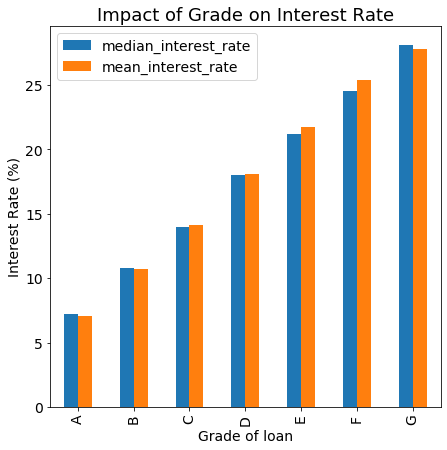

In [15]:
df_grade_vs_interest = df.groupby("grade").agg(median_interest_rate = pd.NamedAgg(column="int_rate", aggfunc="median"), mean_interest_rate = pd.NamedAgg(column="int_rate", aggfunc="mean"))
ax = df_grade_vs_interest.plot.bar(fontsize = 14, figsize = (7,7))
ax.set_title('Impact of Grade on Interest Rate',fontsize= 18)
ax.set_xlabel("Grade of loan", fontsize = 14)
ax.set_ylabel("Interest Rate (%)", fontsize = 14)
plt.legend(loc=2, prop={'size': 14})

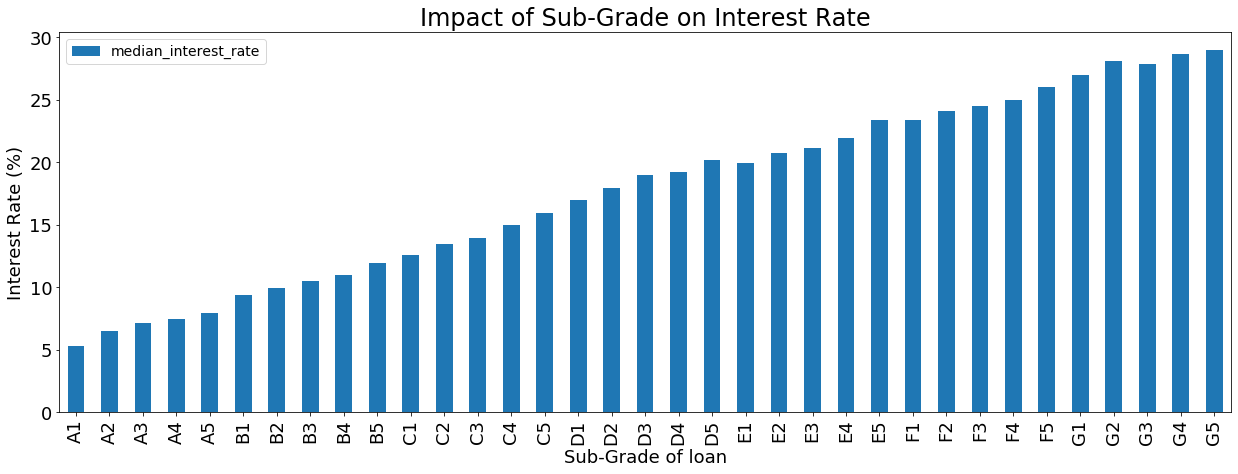

In [16]:
df_subgrade_vs_interest = df.groupby("sub_grade").agg(median_interest_rate = pd.NamedAgg(column="int_rate", aggfunc="median"))
ax = df_subgrade_vs_interest.plot.bar(fontsize = 18, figsize = (21,7))
ax.set_title('Impact of Sub-Grade on Interest Rate',fontsize= 24)
ax.set_xlabel("Sub-Grade of loan", fontsize = 18)
ax.set_ylabel("Interest Rate (%)", fontsize = 18)
plt.legend(loc=2, prop={'size': 14})

In [17]:
# Plotting this out in bar plot is confusing because there is just too much going on and thus it does not add a lot of value
print("Interest rate dependency on both grade and term")
df.groupby(["grade","term"]).agg(int_mean = pd.NamedAgg(column="int_rate", aggfunc="mean"), int_median = pd.NamedAgg(column="int_rate", aggfunc="median"))

Interest rate dependency on both grade and term


int_mean  int_median
grade term                             
A      36 months   7.057765        7.21
       60 months   7.601706        7.84
B      36 months  10.679025       10.90
       60 months  10.702030       10.75
C      36 months  14.063564       13.99
       60 months  14.293489       14.08
D      36 months  18.063915       17.99
       60 months  18.195119       17.97
E      36 months  21.933078       22.35
       60 months  21.617891       20.99
F      36 months  25.311085       24.99
       60 months  25.383295       24.50
G      36 months  27.036555       28.67
       60 months  27.998820       28.14

### Question 13:

If the analysis is refined by separating loans with different start months (the year-month loan issuance date), report your finding.

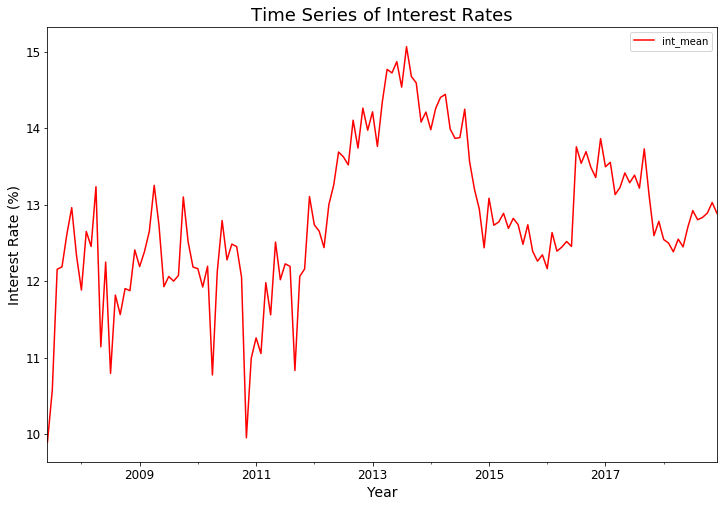

In [18]:
# I am interpreting this question as: Aiko is asking us how the interest rate on the loan is impacted by the issuance date

# Group by the month + year (i.e. - Jun 2007, Jul 2007), and find the average interest rate for that month + year
# Note: the issue_d feature is a string, so it is currently ordered in alphabetical order, i.e. - Apr 2007 is first instead of Jan 2007
df_date_vs_interest = df.groupby("issue_d").agg(int_mean = pd.NamedAgg(column="int_rate", aggfunc="mean"))

# Convert issue_d from an index to an actual column
df_date_vs_interest.reset_index(inplace=True)

# Convert issue_d from string (object) format into datetime format
df_date_vs_interest["issue_d"] = pd.to_datetime(df_date_vs_interest["issue_d"])

# Sort according to dates, not alphabetical order.  Now it goes: Jun 2007, July 2007, Aug 2007, etc.
df_date_vs_interest.sort_values("issue_d", inplace=True)

ax = df_date_vs_interest.plot(kind="line", x="issue_d", y="int_mean", color='red', fontsize = 12, figsize=(12,8))
ax.set_title('Time Series of Interest Rates',fontsize= 18)
ax.set_xlabel("Year", fontsize = 14)
ax.set_ylabel("Interest Rate (%)", fontsize = 14)
plt.show()

### Joe: The time series graph if LendingClub's interest rates has no correlation to either risk-free rates like Fed Funds effective or junk bond credit spreads like BoA HY Master II OAS.  Plain English: factors that normally drive interest rates such as: inflation expectations, economic growth expectations, Fed Reserve open-market operations, and even credit risk of large corporations do not seem to affect LendingClub's loan rates.  Thus, there must be other factors driving this.  Reference links:
- Fed Funds: https://fred.stlouisfed.org/series/FEDFUNDS
- HY OAS: https://fred.stlouisfed.org/series/BAMLH0A0HYM2

### Joe: Here is a possible reason why there was a spike in the interest rate of loans in July 2016

Good article here from May 2016, with quotes below: https://www.inc.com/business-insider/inside-lending-club-scandal.html
- Some of the loans didn't meet the buyer's criteria but were doctored to look as if they did.  In one case, involving $3.0 million in loans, an application date was changed in a live Company database in an attempt to appear to meet the investor's requirement, and the balance of the loans were sold in direct contravention of the investor's direction.
- LendingClub also said: "A number of investors that, in the aggregate, have contributed a significant amount of funding on the platform, have paused their investments in loans through the platform. As a result, the company may need to use its own funds to purchase these loans in the coming months."
- In other words, LendingClub is going to fundamentally shift its business model from taking no risk to taking on the risk of borrowers defaulting. The startup sold itself as simply a marketplace, connecting borrowers with investors, but now it is buying its own product. The equivalent would be Airbnb buying up loads of houses to list on its own platform, to keep it growing.

Conclusion: the raise in interest rates don't just reflect the underlying fundamentals of the borrowers (their fico scores, their credit history, and other factors); LendingClub might have started raising interest rates charged on the loans to protect itself from default

In [19]:
start_date = pd.Timestamp('2016-05-01')
end_date = pd.Timestamp('2016-11-01')
date_range_1 = (start_date <= df_date_vs_interest["issue_d"]) & (df_date_vs_interest["issue_d"] <= end_date)
df_date_vs_interest[date_range_1]


,issue_d,int_mean
100,2016-05-01,12.518318
78,2016-06-01,12.454010
66,2016-07-01,13.756288
20,2016-08-01,13.540413
136,2016-09-01,13.692990
124,2016-10-01,13.486382
112,2016-11-01,13.354486


### Joe: Additionally, there may be other factors driving the interest rate time series of LendingClub loans: maybe the proportion of lower grade loans increased in the year 2012, which caused the interest rate to rise that yet.  This is related to question 4 and 7 in the "warm-up questions" section

### Question 14:

Any rational explanation on why the interest rate should be grade/sub-grade dependent?

### Joe:
- Lower grades indicate weaker financial fundamentals / questionable trustworthiness of the borrower, which manifests in a higher chance of default (not paying back the principal that they borrowed).  Thus, less trusthworthy borrowers (with lower grades) need to offer a higher rate of return to investors / lenders in order to compensate investors / lenders for the higher chance of potential default (and loss of their principal)
- Said another way, in a large portfolio of low grade loans / high yield instruments, the high interest from most loans, paid to investors, is designed to offset the loss of principal by a few (or some) of the loans that default.

### Question 15:

Any rational explanation on the time series variations of interest rates?

### Joe:
- See above

### Question 16:

Any rational explanation why the interest rate rise w.r.t. loan term?

### Joe:
- Interest rates are higher for longer terms because the uncertainty is higher for a loan that matures further in the future (the longer a loan is outstanding, the higher chance it will default at some point).  Ex: if a loan is outstanding for just one week, it is unlikely to default in the next 5 business days, but if a loan is outstanding for several years, there are plenty of chances that something goes wrong and the borrower will default
- Another reason is the liquidity of longer-dated loans are worse than shorter-dated loans.  A 5-year loan locks your money away for 5 years, whereas a 1-year loan will mature and return principal back to you in just one year.

# Question Group: Loan Status (Joe)
 - For investors, it is crucial to know whether a loan is served to completion (loan_status 'Fully Paid')

### Question 17:

Please analyze the percentages of non-completed loans in each loan grade/subgrade (i.e. default, charged off) which go beyond delinquency.

### Joe: Some definitions here: https://help.bitbond.com/article/20-the-10-loan-status-variants-explained
- **Fully paid**: A ‘fully paid’ loan has been repaid in full including all principal and interest payments.
- **Current**: A loan can have the status ‘current’ when one or more payments have been completed and no payments are past due. It also means that this loan still has one or more scheduled future payments. 
- **In grace period**: This status indicates that a loan has become due (regardless if it's the first payment or a consecutive payment on the loan). This period lasts 3 days from the time the payment becomes due. If the borrower completes the payment during that time the payment is marked as "Paid on time" and no late interest is charged on the loan.
- **Charged off**: After a loan has been defaulted we take action as described above. Once our actions and those of the debt collection agencies that we work with are completed, the loan is ‘charged off’. From this status everybody knows that no further action is taken on this loan and all dunning, collection and legal measures that are possible have been completed.

In [20]:
# Check the various status of loans and their counts
df["loan_status"].value_counts()

Fully Paid                                             54048
Current                                                43759
Charged Off                                            13539
Late (31-120 days)                                      1069
In Grace Period                                          454
Late (16-30 days)                                        231
Does not meet the credit policy. Status:Fully Paid       177
Does not meet the credit policy. Status:Charged Off       66
Name: loan_status, dtype: int64

### For this question, we will ignore "current" and "full paid" because they are not delinquent.  We will also ignore "in grace period", "late (16-30 days)", and "late (31-120 days)" because they are forms of delinquencies.

### Thus, we should focus on "charged off" and "Does not meet the credit policy. Status: Charged Off"

In [21]:
# Normalize to get the percentage of loans in each status
loan_status_percentages_by_grade = df.groupby("grade")["loan_status"].value_counts(normalize = True)

# Convert from Series to Dataframe
loan_status_percentages_by_grade = loan_status_percentages_by_grade.to_frame()
loan_status_percentages_by_grade.rename(columns={"loan_status": "percentage"}, inplace=True)

loan_status_percentages_by_grade

percentage
grade loan_status                                                   
A     Fully Paid                                            0.517855
      Current                                               0.443052
      Charged Off                                           0.032737
      Late (31-120 days)                                    0.003155
      In Grace Period                                       0.001875
      Late (16-30 days)                                     0.000732
      Does not meet the credit policy. Status:Fully Paid    0.000503
      Does not meet the credit policy. Status:Charged...    0.000091
B     Fully Paid                                            0.511352
      Current                                               0.396258
      Charged Off                                           0.080160
      Late (31-120 days)                                    0.007447
      In Grace Period                                       0.002452
      Late (16-30 days)                                     0.001453
      Does not meet the credit policy. Status:Fully Paid    0.000696
      Does not meet the credit policy. Status:Charged...    0.000182
C     Fully Paid                                            0.453487
      Current                                               0.394094
      Charged Off                                           0.131953
      Late (31-120 days)                                    0.011039
      In Grace Period                                       0.005109
      Late (16-30 days)                                     0.002494
      Does not meet the credit policy. Status:Fully Paid    0.001338
      Does not meet the credit policy. Status:Charged...    0.000487
D     Fully Paid                                            0.436575
      Current                                               0.347904
      Charged Off                                           0.187788
      Late (31-120 days)                                    0.015110
      In Grace Period                                       0.006156
      Late (16-30 days)                                     0.003358
      Does not meet the credit policy. Status:Fully Paid    0.002363
      Does not meet the credit policy. Status:Charged...    0.000746
E     Fully Paid                                            0.418919
      Current                                               0.280259
      Charged Off                                           0.268801
      Late (31-120 days)                                    0.014395
      In Grace Period                                       0.007344
      Does not meet the credit policy. Status:Fully Paid    0.004847
      Late (16-30 days)                                     0.003231
      Does not meet the credit policy. Status:Charged...    0.002203
F     Fully Paid                                            0.400388
      Charged Off                                           0.370334
      Current                                               0.197286
      Late (31-120 days)                                    0.014542
      Does not meet the credit policy. Status:Charged...    0.004847
      Does not meet the credit policy. Status:Fully Paid    0.004847
      In Grace Period                                       0.004363
      Late (16-30 days)                                     0.003393
G     Charged Off                                           0.368771
      Fully Paid                                            0.363787
      Current                                               0.182724
      Late (31-120 days)                                    0.033223
      Does not meet the credit policy. Status:Fully Paid    0.029900
      In Grace Period                                       0.009967
      Does not meet the credit policy. Status:Charged...    0.008306
      Late (16-30 days)                                     0.003322

In [22]:
# Filter by only loan status "charged off"
charged_off_percentage_2 = loan_status_percentages_by_grade.xs("Charged Off", level=1, drop_level=False)
charged_off_percentage_2 = charged_off_percentage_2.droplevel(level=1)
charged_off_percentage_2.rename(columns={"percentage": "percentage_charged_off"}, inplace=True)
charged_off_percentage_2

,percentage_charged_off
grade,
A,0.032737
B,0.080160
C,0.131953
D,0.187788
E,0.268801
F,0.370334
G,0.368771


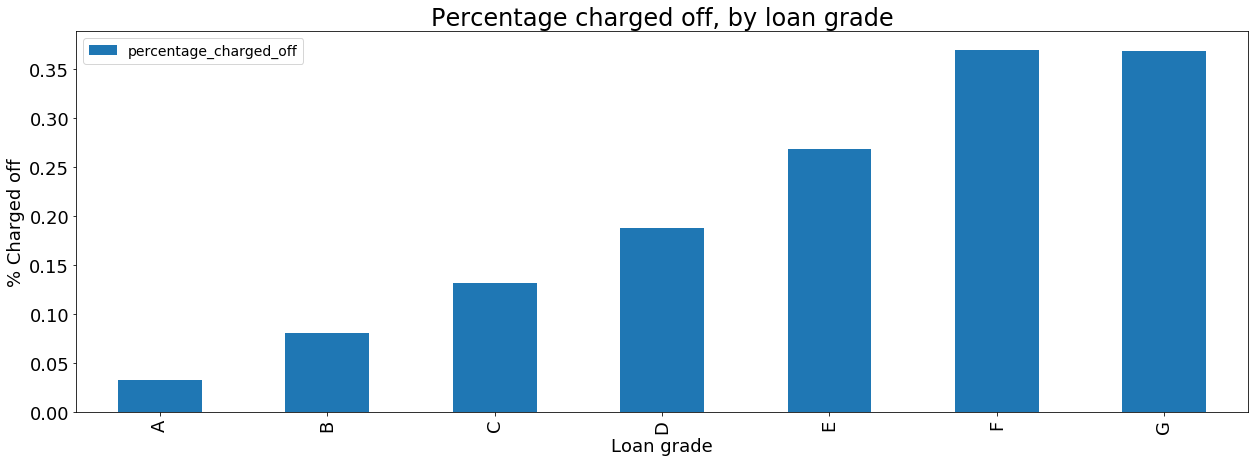

In [23]:
ax = charged_off_percentage_2.plot.bar(fontsize = 18, figsize = (21,7))
ax.set_title("Percentage charged off, by loan grade",fontsize= 24)
ax.set_xlabel("Loan grade", fontsize = 18)
ax.set_ylabel("% Charged off", fontsize = 18)
plt.legend(loc=2, prop={'size': 14})

### Question 18:
Provide justification for the introduction of loan grade/subgrade.

### Joe:
- Loan grades are required to divide up the loans into higher quality (less likely to default, lower rates of delinquencies and charge offs) vs. lower quality (more likely to default, higher rates of delinquencies and charge offs)

### Question 19:
Provide justification on the rate hike on riskier loan grade/subgrade.

### Joe: Same answer as question 14 above:
- Lower grades indicate weaker financial fundamentals / questionable trustworthiness of the borrower, which manifests in a higher chance of default (not paying back the principal that they borrowed).  Thus, less trusthworthy borrowers (with lower grades) need to offer a higher rate of return to investors / lenders in order to compensate investors / lenders for the higher chance of potential default (and loss of their principal)
- Said another way, in a large portfolio of low grade loans / high yield instruments, the high interest from most loans, paid to investors, is designed to offset the loss of principal by a few (or some) of the loans that default.

### Question 20:

What happens to percentage rates of loans involving settlement?

### Joe:
- I assume that it should be much higher after a settlement event, but I cannot find any field in the data that shows "interest_rate" after settlement event.  Only one field "int_rate" is available
- **Does anyone have an idea on how to answer this one??**

### Question 21:

Make sure that your analysis takes into account of loan-term.

In [24]:
# Normalize to get the percentage of loans in each status
loan_status_percentages_by_term = df.groupby("term")["loan_status"].value_counts(normalize = True)

# Convert from Series to Dataframe
loan_status_percentages_by_term.rename(columns={"loan_status": "percentage"}, inplace=True)

loan_status_percentages_by_term 

term        loan_status                                        
 36 months  Fully Paid                                             0.534555
            Current                                                0.348636
            Charged Off                                            0.101576
            Late (31-120 days)                                     0.007548
            In Grace Period                                        0.003163
            Does not meet the credit policy. Status:Fully Paid     0.002051
            Late (16-30 days)                                      0.001730
            Does not meet the credit policy. Status:Charged Off    0.000741
 60 months  Current                                                0.479614
            Fully Paid                                             0.332695
            Charged Off                                            0.164110
            Late (31-120 days)                                     0.014136
            In Grace Per

In [25]:
# Filter by only loan status "charged off"
charged_off_percentage_3 = loan_status_percentages_by_term.xs("Charged Off", level=1, drop_level=False)
charged_off_percentage_3 = charged_off_percentage_3.droplevel(level=1)
charged_off_percentage_3.rename(columns={"percentage": "percentage_charged_off"}, inplace=True)
charged_off_percentage_3

term
 36 months    0.101576
 60 months    0.164110
dtype: float64

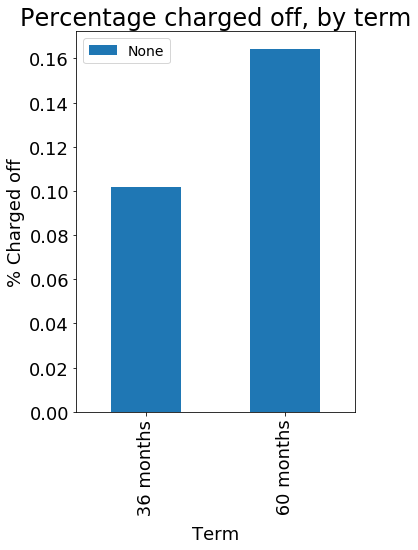

In [28]:
ax = charged_off_percentage_3.plot.bar(fontsize = 18, figsize = (5,7))
ax.set_title("Percentage charged off, by term",fontsize= 24)
ax.set_xlabel("Term", fontsize = 18)
ax.set_ylabel("% Charged off", fontsize = 18)
plt.legend(loc=2, prop={'size': 14})

# Joe: Some other background info from my research.  Good bullet points for "setting the stage", and painting a background to kick off the capstone presetation.  Sort of "Why do we care?  Well, we should care because fintech lending is a big deal and here is why"
- LendingClub was really well-respected back in 2013.  "Google Inc. is making the bulk of a 125 million dollar investment into San Francisco-based Lending Club.  Google is investing in Lending Club by buying shares of the startup from its existing investors, with those investors selling 15% to 20% of their stakes in the company, in what is known as a secondary transaction.  In recent months, Lending Club has also added some heavyweight financial names to its board, including Kleiner partner Mary Meeker, former Morgan Stanley CEO John Mack, as well as former Treasury Secretary Larry Summers." Source: https://blogs.wsj.com/digits/2013/05/02/google-makes-strategic-investment-in-lending-club/
- On the basis of the borrower’s credit score, credit history, desired loan amount and the borrower’s debt-to-income ratio, LendingClub determines whether the borrower is creditworthy and assigns to its approved loans a credit grade that determines the payable interest rate and fees.  Source: https://en.wikipedia.org/wiki/LendingClub
- LendingClub promises to pay the noteholder monies it receives from the borrower less its service fees, while the holders of LendingClub notes have the status of unsecured creditors of LendingClub. This means that there is a risk that the investor may lose all or part of the investment if LendingClub becomes insolvent or declares bankruptcy, even if the ultimate borrower continues to pay.  Source: https://en.wikipedia.org/wiki/LendingClub
- To reduce default risk, LendingClub focuses on high-credit-worthy borrowers, declining approximately 90% of the loan applications it received as of 2012 and assigning higher interest rates to riskier borrowers within its credit criteria. Only borrowers with FICO score of 660 or higher can be approved for loans.  Source: https://en.wikipedia.org/wiki/LendingClub
- "As of 2016, LendingClub's unsecured consumer lending exhibited inherent credit risk and lending efficiency that resembled the risk and efficiency of the largest traditional lenders," the researchers wrote. They included Joseph Hughes, an economics professor at Rutgers University, along with Julapa Jagtiani of the Philadelphia Fed and Choon-Geol Moon of Hanyang University. Source: https://www.thestreet.com/markets/lendingclub-computers-no-worse-at-lending-than-humans-study-finds-14914936
- In general, fintech is taking significant market share from banks and traditional finance companies.  Quoted here, in 2019: "Fintechs are continuing to siphon away customers for unsecured personal loans from traditional lenders, according to a study released Wednesday by Experian.  The study found that digital lenders more than doubled their market share in the past four years, with consumers across the credit spectrum increasingly turning to fintechs like LendingClub and Social Finance.  Fintechs now provide 49.4% of unsecured personal loans as of March, compared with 22.4% in 2015, according to Experian."  Source: https://www.americanbanker.com/news/fintechs-continue-to-take-market-share-from-banks-new-survey-finds
- "LendingClub, despite having challenges in 2016 is now the leading personal loan provider in the US. Other players fill the gaps, targeting almost every credit profile imaginable. We have companies like Avant and LendingPoint which focus on near prime consumers. LendingClub, Prosper and Upgrade have focused increasingly on prime and super-prime consumers. Mixed in we have companies like Upstart and SoFi who have catered to millennials and those who may have a thin credit profile but would otherwise be considered prime consumers"  Source: https://www.lendacademy.com/a-look-back-at-the-five-years-since-the-lendingclub-ipo/
- "The great equalizer in the industry has been the advent of aggregator sites like Credit Karma and LendingTree" Source: https://www.lendacademy.com/the-current-state-of-the-installment-loan-sector/

# Question Group: Amortization Process
 - For investors, the amortization process returns the partial principal and monthly interest in a single montly installment payment
 
**JAMIE ANDERSON**

### Question 22:

Because the borrower can pre-pay the principal at-will or go belly-up (delinquent or default) at any moment within the loan term, it may shorten the loan duration un-expectedly or cause losses to the investors.

### Question 23:

Thus it is vital for the investors to know the general pattern of loan-prepayment or delinquency (early stage leading to default or eventual charged off).

### Question 24:

Please compute the actual durations of loans (last_payment_date - issuance_date):
 - analyze the pattern debtors terminate the loans before loan maturity (either 'fully paid', or stop paying henceforth).
 - Please include 'term', 'loan-grade/sub-grade' in your analysis.

### Question 25:

Do you see major differences on the patterns with different loan-terms? What is the rational explanation for this difference?
 - Report the major characteristics of the patterns.

### Question 26:

Do '60 months' (5 years) loans often get terminated at the end of the 5 years loan term? Why not?

# Question Group: Profitability

- For investors, the profitability of the loans is of their central 
concern.

**VINCENT JI**

### Question 27:

For a given loan, the profit-and-loss (in percentages) can be computed as the (total_payment - principal)/principal.

### Question 28:

For those loans which are eventually 'Fully Paid', what are the average returns (or the distributions of returns) of different loan grades/terms?

### Question 29:

For those loans wich are default or beyond, what are the average returns or return distributions?

### Question 30:

What about all the loans which have been terminated ('fully paid', 'default', 'charged off')?

### Question 31:

What about the loans which end up in loan settlement negotiations?

### Question 32:

Any variation of patterns for different loan purposes?

### Question 33:

What happens if the issuance years are included in your analysis?

**REMOVE**

### Question 34:

Is there any pattern between loan duration vs return rate?

# Question Group: Data Analytics
- A good investor may want to avoid these types of loans
- The insights might be used in ML task to single out these bad loans

**JON HARRIS & JOE LU**

### Question 40: 

What types of loans tend to prepay and terminate within 3 months of the loan issuance?

### Question 41:

What types of loans tend to default (or go into charged off) within a short duration after issuance?

### Question 42:

Does default rate (including those get charged off or into settlement) holds constant across different time (year-months)?

### Question 43:

If not, what are the external driving forces which cause the default rate to rise or fall?

### Question 44:

Can you provide data and statistical evidence for your analysis?

# Question Group: Mini-Project

As a data scientist at **Lending Club**, provide strong evidence to educate the lenders why diversification is important.

- For simplicity, compare the investment returns of three types of loan portfolios
    - 20 equal-dollar investments in 20 grade A loans. 
    - 100 equal-dollar investments in 100 grade A loans.
    - 20 equal-dollar investments in $5+5+5+5$ loans in grade $A, B, C, D$, respectively, $5$
in each grade
    - 100 equal-dollar investments in $25+25+25+25$ loans in grade $A, B, C, D$, respectively,
 $25$ loans in each grade.
    - Or you can invest 1% (of the loan amount) and diversify into many loans

- Simulate uncertainty by randomly drawing from grade A, B, C, D loan buckets
    - Because loans often terminate prematurely, in order for the comparison to
be objective, you will need to annualize the returns by first computing the average
duration of your loan portfolios.
    - To be more accurate, you can take 'issuance date' into account and offer
simulation during different years (or year-months).
    - Due to the stochastic nature of the problem at hand, you should analyze
the mean annualized returns, risks of each type of portfolios, probability of loss, etc.

- Alternatively, as a data scientist at a start-up investing firm, provide a business report
whether loan-investing buying **Lending Club** loans is an attractive option, 
compared to short-term treasury/corporate funds?



# Question Group: Survival Analysis on Survival Probabilities

- In the context of Lending Club Loans, a loan starts to default  121
121 days after it fails to make the payment on time.

### Question 35:

For loans which are eventually paid in full, analyze the probabilities of survival at different time durations (known as survival plot). How are these probabilities of 'survival' related to the loan grade/subgrade or the FICO scores of the borrowers? To visualize, you want to plot the so-called survival curve.

### Question 36:

For loans which are eventually defaulted, analyze the probabilities of survival at different time durations and find out its relationship with loan grade/subgrade, FICO scores or the other credit related attributes.

### Question 37:

Lumping defaulted loans and completed loans together, a loan either pre-pays early , defaults or completes at maturity. Perform survival analysis and study what features affect the patterns.

### Question 38:

You can either compute from the raw data from scratch, or use R-package like survminer to assist your analysis.

### Question 39:

In survival analysis jargon, the dual cause of the early termination of the loan (either early prepayment or default) is usually known as competing events/competing risks, or mixture cure model.